In [1]:
import numpy as np

np.random.seed(42)

mu, sigma = 0, 1
q = {k+1: v for k, v in enumerate(np.random.normal(mu, sigma, 5))} # almaceno 10 numeros random
q

{1: 0.4967141530112327,
 2: -0.13826430117118466,
 3: 0.6476885381006925,
 4: 1.5230298564080254,
 5: -0.23415337472333597}

Selección de acciones con intervalo de confianza

In [10]:
import math

partidas = 1000
rondas = 100
alpha = 0.5
c = 1
epsilons = [0.1, 0.1]
recompensas_medias = np.zeros((len(epsilons), rondas))
acciones_optimas = np.zeros((len(epsilons), rondas))

for ejer in range(partidas):
    mejor_accion = max(q, key=q.get)
    for i, e in enumerate(epsilons):
        Q = {k:0 for k in range(1,6)}
        acciones = {k:1 for k in range(1,6)} # inicializo todas las acciones con 1
        for exp in range(rondas): 
            if i == 0: # UCB
                maxQ = -100 # inicializo maxQ con un valor muy bajo
                for j in range(1, 6): # recorro las acciones
                    A = Q[j] + c*math.sqrt(math.log(exp+1)/(acciones[j])) # calculo el valor de A para cada accion
                    if A > maxQ:
                        maxQ = A
                        accion = j
            else:
                # elegir la accion a tomar con probabilidad 1-e y la mejor accion con probabilidad e
                if np.random.uniform(0,1) < e:
                    accion = np.random.randint(5) + 1
                else:
                    for j in range(1, 6): # recorro las acciones
                        if Q[j] > maxQ:
                            maxQ = Q[j]
                            accion = j # guardo la accion con mayor valor de Q
            # actualizo las recompensas medias
            acciones[accion] += 1
            recompensa = q[accion]  # genero la recompensa
            Q[accion] += alpha*(recompensa - Q[accion]) # actualizo el valor de Q
            
            if exp < rondas:
                recompensas_medias[i][exp] += recompensa  # Agregamos la recompensa a la matriz
                acciones_optimas[i][exp] += (accion == mejor_accion)

recompensas_medias /= partidas
acciones_optimas /= partidas

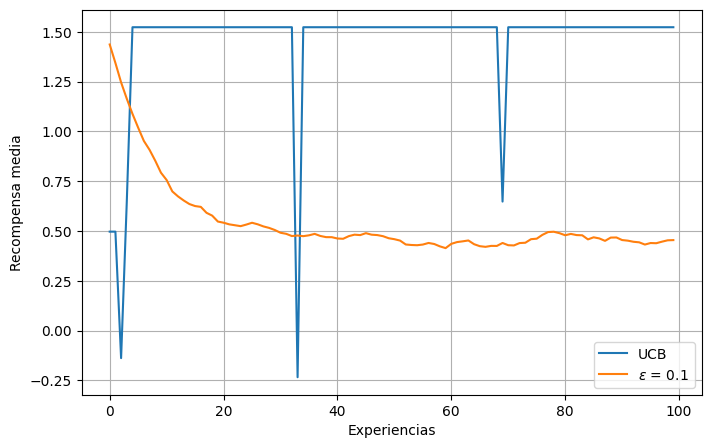

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
for i, e in enumerate(epsilons):
    plt.plot(recompensas_medias[i], label=f'$\epsilon$ = {e}' if i != 0 else "UCB")
plt.legend()
plt.grid(True)
plt.xlabel('Experiencias')
plt.ylabel('Recompensa media')
plt.show()